In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import ImageGrab
from scipy import stats

# Question 3

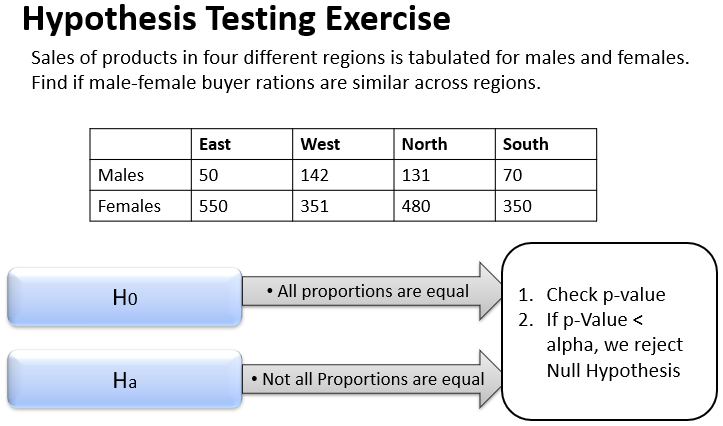

In [2]:
ImageGrab.grabclipboard()

### We are going to conduct a Test of Independence using Chi-Square $\chi_2$ test with Contingency table

### Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** There is no association or dependency between the gender based buyer rations across regions
+ **Alternative Hypthosis:** There is a significant association or dependency between the gender based buyer rations across regions

### Step 2
#### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

#### As it is a one-tailed test
+ **alpha = 1-0.95 = 0.05**

### Step 3 
#### Collect evidence

#### Importing Files

In [3]:
df = pd.read_csv('data/BuyerRatio.csv', index_col = 0)

In [4]:
df.head()

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [5]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

#### Applying Chi-Square $\chi_2$ contingency table to convert observed value into expected value

In [6]:
stat, p, dof, exp = stats.chi2_contingency(df) 
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [7]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [8]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

### Step 4
#### Comparing Evidence with Hypothesis

In [9]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


#### Compare p_value with '$\alpha$ '(Significane Level)

##### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
##### If p_value is = '$\alpha$ ' we reject Null Hypothesis

#### interpreting p-value

In [10]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


### We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples